In [1]:
import pandas as pd
import getpass, os
os.environ['PSQL_USER']='dengueadmin'
os.environ['PSQL_HOST']='localhost'
os.environ['PSQL_DB']='dengue'
os.environ['PSQL_PASSWORD']=getpass.getpass("Enter the database password: ")

Enter the database password: ········


In [2]:
os.chdir('..')
from infodenguepredict.data.infodengue import get_temperature_data, get_alerta_table, get_tweet_data
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
# geocodigo = 3301009 # Campos 
# geocodigo = 3304904 #São Gonçalo
geocodigo = 3303906 #Petropolis

## Loading The Data

for our exploration let's pick the city of Rio de Janeiro.

In [22]:
A = get_alerta_table(geocodigo)#(3303500)
T = get_temperature_data(geocodigo)#(3303500)
Tw = get_tweet_data(geocodigo)#(3303500)

Let's look at the tables

In [23]:
A.head()

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome
data_iniSE,,,,,,,,,,,,
2010-01-03,201001,6.0,6,6,6,3303906,0.0,2.012360,0,1,2017-04-25,Petrópolis
2010-01-10,201002,6.0,6,6,6,3303906,0.0,2.012360,0,1,2017-04-25,Petrópolis
2010-01-17,201003,0.0,0,0,0,3303906,0.0,0.000000,0,1,2017-04-25,Petrópolis
2010-01-24,201004,2.0,2,2,2,3303906,0.0,0.670785,0,1,2017-04-25,Petrópolis
2010-01-31,201005,3.0,3,3,3,3303906,0.0,1.006180,0,1,2017-04-25,Petrópolis


In [24]:
T = T[~T.index.duplicated()]
T.head()

,temp_min,temp_max,umid_min,pressao_min
data_dia,,,,
2011-12-31,22.0,29.0,57.0,1007.0
2012-01-01,23.0,28.0,65.0,1003.0
2012-01-02,21.0,23.0,75.0,1003.0
2012-01-03,20.0,28.0,49.0,1008.0
2012-01-04,22.0,28.0,52.0,1011.0


In [25]:
Tw = Tw[~Tw.index.duplicated()]
Tw.head()

,numero,CID10_codigo
data_dia,,
2012-08-01,0,A90
2012-08-02,0,A90
2012-08-03,0,A90
2012-08-04,0,A90
2012-08-05,1,A90


Let's try to join the tables by date. To align them, we must downsample each one to a weekly time frame

In [26]:
T.resample('W-SUN').mean().tail()


,temp_min,temp_max,umid_min,pressao_min
data_dia,,,,
2017-04-02,20.714286,22.428571,73.571429,1014.571429
2017-04-09,22.428571,24.285714,76.000000,1013.285714
2017-04-16,21.857143,24.428571,71.285714,1014.000000
2017-04-23,21.142857,24.000000,68.857143,1014.000000
2017-04-30,19.333333,21.000000,82.333333,1014.666667


In [27]:
Full = A.join(T.resample('W-SUN').mean()).join(Tw.resample('W-SUN').sum())
Full.head()

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome,temp_min,temp_max,umid_min,pressao_min,numero
data_iniSE,,,,,,,,,,,,,,,,,
2010-01-03,201001,6.0,6,6,6,3303906,0.0,2.012360,0,1,2017-04-25,Petrópolis,NaN,NaN,NaN,NaN,NaN
2010-01-10,201002,6.0,6,6,6,3303906,0.0,2.012360,0,1,2017-04-25,Petrópolis,NaN,NaN,NaN,NaN,NaN
2010-01-17,201003,0.0,0,0,0,3303906,0.0,0.000000,0,1,2017-04-25,Petrópolis,NaN,NaN,NaN,NaN,NaN
2010-01-24,201004,2.0,2,2,2,3303906,0.0,0.670785,0,1,2017-04-25,Petrópolis,NaN,NaN,NaN,NaN,NaN
2010-01-31,201005,3.0,3,3,3,3303906,0.0,1.006180,0,1,2017-04-25,Petrópolis,NaN,NaN,NaN,NaN,NaN


In [28]:
Full.to_csv('petropolis_full.csv', sep=',')

Note que as datas para as datas mais antigas os dados faltantes de Temperatura e Tweets, foram substituídos por NaN. Podemos remover estas datas, ficando com uma tabela sem dados faltantes. Mas perde-se mais de dois anos de dados.

In [9]:
Short = Full.dropna()
Short.head()

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome,temp_min,temp_max,umid_min,pressao_min,numero
data_iniSE,,,,,,,,,,,,,,,,,
2012-08-05,201232,452.0,452,452,452,3304557,1.278890e-10,6.95509,0,1,2017-03-29,Rio de Janeiro,18.571429,28.000000,40.142857,886.857143,90.0
2012-08-12,201233,478.0,478,478,478,3304557,6.105840e-03,7.35516,0,1,2017-03-29,Rio de Janeiro,16.142857,26.714286,34.571429,1019.428571,83.0
2012-08-19,201234,377.0,377,377,377,3304557,5.351960e-05,5.80104,0,1,2017-03-29,Rio de Janeiro,17.571429,27.714286,39.857143,1023.000000,63.0
2012-08-26,201235,326.0,326,326,326,3304557,2.434650e-05,5.01628,0,1,2017-03-29,Rio de Janeiro,16.857143,28.142857,31.571429,1020.571429,57.0
2012-09-02,201236,211.0,211,211,211,3304557,1.869840e-12,3.24673,0,1,2017-03-29,Rio de Janeiro,17.714286,25.428571,40.142857,1017.857143,64.0


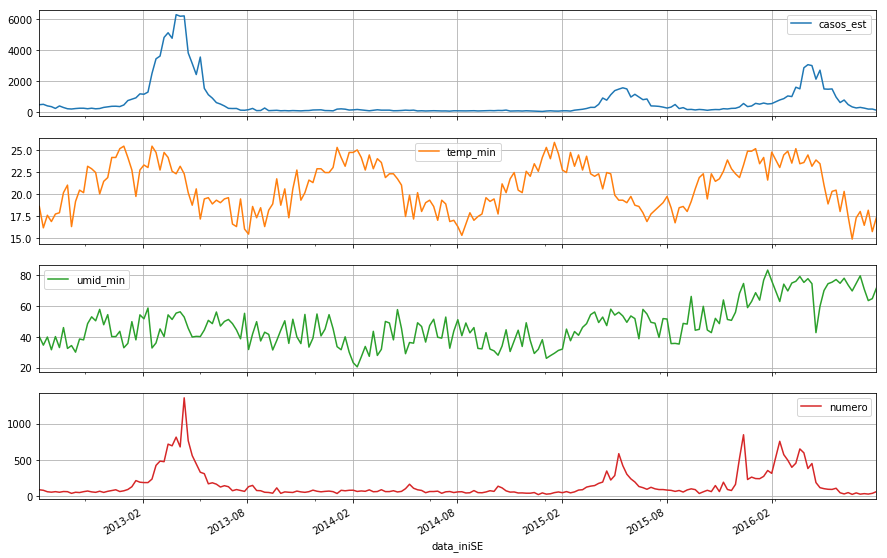

In [10]:
Short[['casos_est', 'temp_min', 'umid_min', 'numero']].plot(subplots=True, figsize=(15,10),grid=True);

# Calculando uma previsão

In [11]:
from infodenguepredict.models import sarimax,GAS,GASX
import statsmodels.api as sm

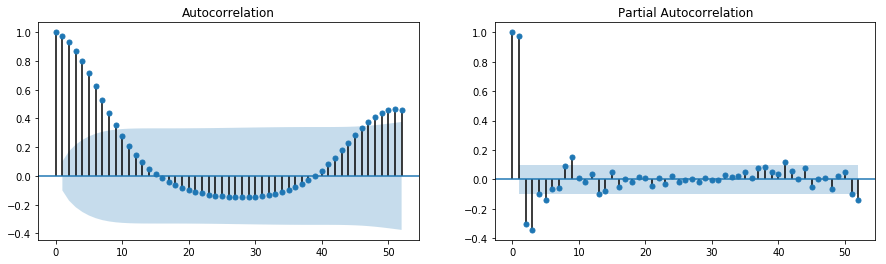

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

fig = sm.graphics.tsa.plot_acf(Full.ix[1:, 'casos'], lags=52, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Full.ix[1:, 'casos'], lags=52, ax=axes[1])

In [17]:
# Short.casos = Short.casos.apply(pd.np.log) 
model_1 = sarimax.build_model(Full, endog='casos',exog=[])

In [18]:
fit_1 = model_1.fit()

In [19]:
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             casos   No. Observations:                  377
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 8)   Log Likelihood               -2658.140
Date:                           Mon, 03 Apr 2017   AIC                           5330.280
Time:                                   10:21:04   BIC                           5357.806
Sample:                               01-03-2010   HQIC                          5341.206
                                    - 03-19-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4358      0.082      5.287      0.000       0.274       0.597
ar.L2          0.2608      0.048      5.396      0.000       0.166       0.356
ma.L1         -0.2934      0.081     -3.610      0.000      -0.453      -0.134
ar.S.L8       -0.1924      0.038     -5.086      0.000      -0.267      -0.118
ar.S.L16      -0.0666      0.107     -0.621      0.535      -0.277       0.144
ma.S.L8       -0.9786      0.118     -8.278      0.000      -1.210      -0.747
sigma2      2.201e+05   2.17e+04     10.124      0.000    1.77e+05    2.63e+05
===================================================================================
Ljung-Box (Q):                       35.64   Jarque-Bera (JB):              3225.29
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -1.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

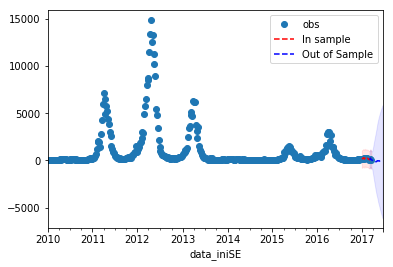

In [20]:
def plot_pred(fit):
    predict = fit.get_prediction(start='2017-01-01',dynamic=False)
    predict_ci = predict.conf_int()
    Full.casos.plot(style='o',label='obs')
    predict.predicted_mean.plot(style='r--', label='In sample')
    plt.fill_between(predict_ci.index, predict_ci.ix[:, 0], predict_ci.ix[:, 1], color='r', alpha=0.1)
    forecast = fit.get_prediction(start='2017-03-05', end='2017-06-21', dynamic=False)
    forecast_ci = forecast.conf_int()
    forecast.predicted_mean.plot(style='b--', label='Out of Sample')
    plt.fill_between(forecast_ci.index, forecast_ci.ix[:, 0], forecast_ci.ix[:, 1], color='b', alpha=0.1)
    plt.legend(loc=0)
plot_pred(fit_1)

### Using multi-year averages for extending exogenous variables
In order to generate predictions from SARIMAX using exogenous variables, we need a method of forecasting the exogenous variables in order to feed the predictions. Now we are going to explore the use of multi-year averages as a surrogate for the futures observations of exogenous variables.

In [18]:
exog = Full[['temp_min','umid_min', 'pressao_min']]

Let's take a look at the exogenous weekly means.

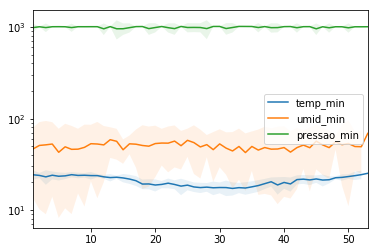

In [23]:
exog_means = exog.groupby(exog.index.week).mean()
exog_std = exog.groupby(exog.index.week).std()
exog_means.plot(logy=True);
for c in exog.columns:
    plt.fill_between(exog_std.index,exog_means[c]-(1.96* exog_std[c]),exog_means[c]+(1.96* exog_std[c]), alpha=0.1);

Now suppose we are doing predictions for 2017. We need to add a date index starting in the same date our incidence series start, so that we can align the weekly averages, with the incidence timeseries.

In [27]:
Full[Full.index.year==2017].index[0]

Timestamp('2017-01-01 00:00:00')

In [29]:
new_index = pd.date_range(start='2017-01-01',periods=53,freq='W')
new_index

DatetimeIndex(['2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22',
               '2017-01-29', '2017-02-05', '2017-02-12', '2017-02-19',
               '2017-02-26', '2017-03-05', '2017-03-12', '2017-03-19',
               '2017-03-26', '2017-04-02', '2017-04-09', '2017-04-16',
               '2017-04-23', '2017-04-30', '2017-05-07', '2017-05-14',
               '2017-05-21', '2017-05-28', '2017-06-04', '2017-06-11',
               '2017-06-18', '2017-06-25', '2017-07-02', '2017-07-09',
               '2017-07-16', '2017-07-23', '2017-07-30', '2017-08-06',
               '2017-08-13', '2017-08-20', '2017-08-27', '2017-09-03',
               '2017-09-10', '2017-09-17', '2017-09-24', '2017-10-01',
               '2017-10-08', '2017-10-15', '2017-10-22', '2017-10-29',
               '2017-11-05', '2017-11-12', '2017-11-19', '2017-11-26',
               '2017-12-03', '2017-12-10', '2017-12-17', '2017-12-24',
               '2017-12-31'],
              dtype='datetime64[ns]', freq='W-S

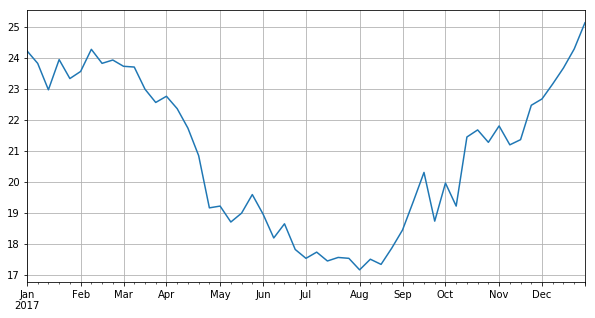

In [39]:
exog_means.index=new_index
exog_means.temp_min.plot(figsize=(10,5), grid=True);

In [21]:
model_1a = sarimax.build_model(Short, endog='casos', exog=['temp_min','umid_min','pressao_min'])

In [34]:
# fit_1a = model_1a.fit()
# model_1a.exog.mean(axis=0)
Short[['temp_min','umid_min','pressao_min']]

,temp_min,umid_min,pressao_min
data_iniSE,,,
2012-08-05,18.571429,40.142857,886.857143
2012-08-12,16.142857,34.571429,1019.428571
2012-08-19,17.571429,39.857143,1023.000000
2012-08-26,16.857143,31.571429,1020.571429
2012-09-02,17.714286,40.142857,1017.857143
2012-09-09,17.857143,33.000000,1017.571429
2012-09-16,20.142857,46.000000,1013.714286
2012-09-23,21.000000,32.428571,880.428571
2012-09-30,16.285714,34.285714,887.285714


In [17]:
model_2 = GAS.build_model(Full, ar=2, sc=6, target='casos')
fit_2 = model_2.fit()

In [18]:
fit_2.summary()

PoissonGAS (2,0,6)                                                                                        
======================================================= ==================================================
Dependent Variable: casos                               Method: MLE                                       
Start Date: 2010-02-14 00:00:00                         Log Likelihood: -22574.8631                       
End Date: 2017-03-19 00:00:00                           AIC: 45167.7261                                   
Number of observations: 371                             BIC: 45202.9719                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 2.6502     0.0513     51.6787  0.0      (2.5497 | 2.7507)        
AR(1)                                

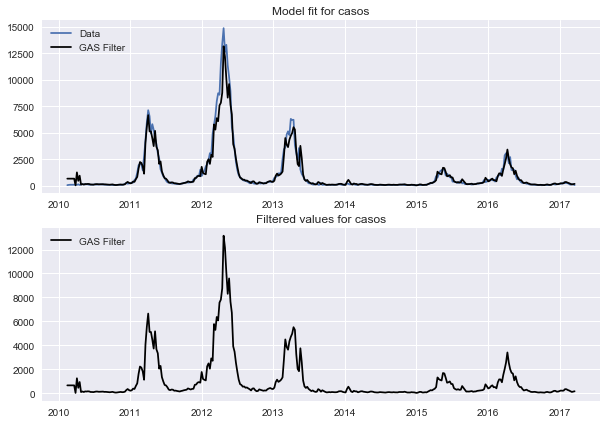

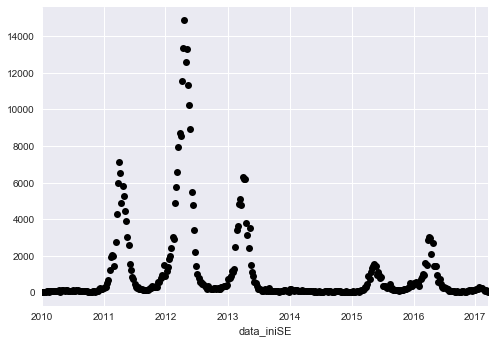

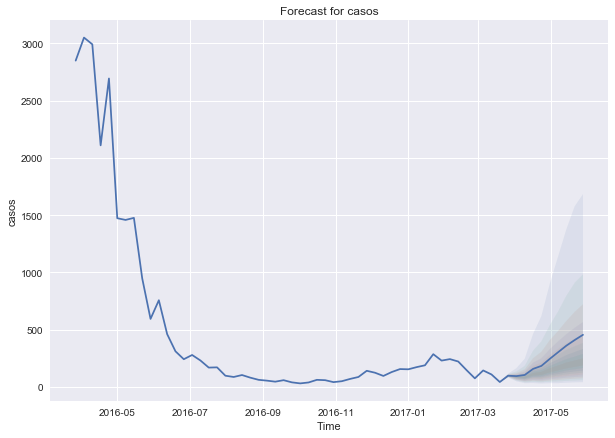

In [19]:
model_2.plot_fit()
plt.savefig('GAS_in_sample.png')
Full.casos.plot(style='ko')
model_2.plot_predict(h=10, past_values=52)

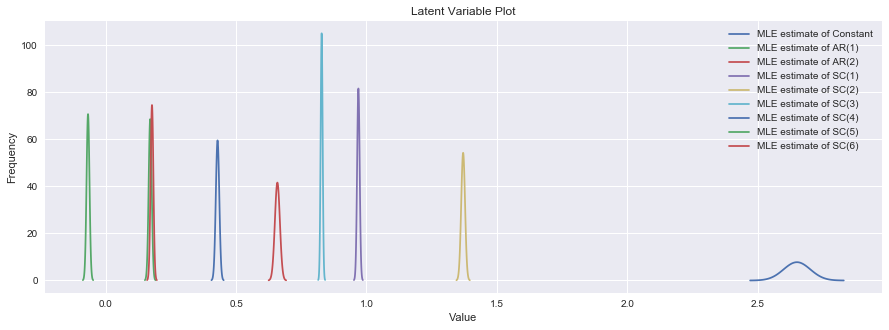

In [20]:
model_2.plot_z(figsize=(15,5))

## Splitting the dataset for out-of-sample prediction validation

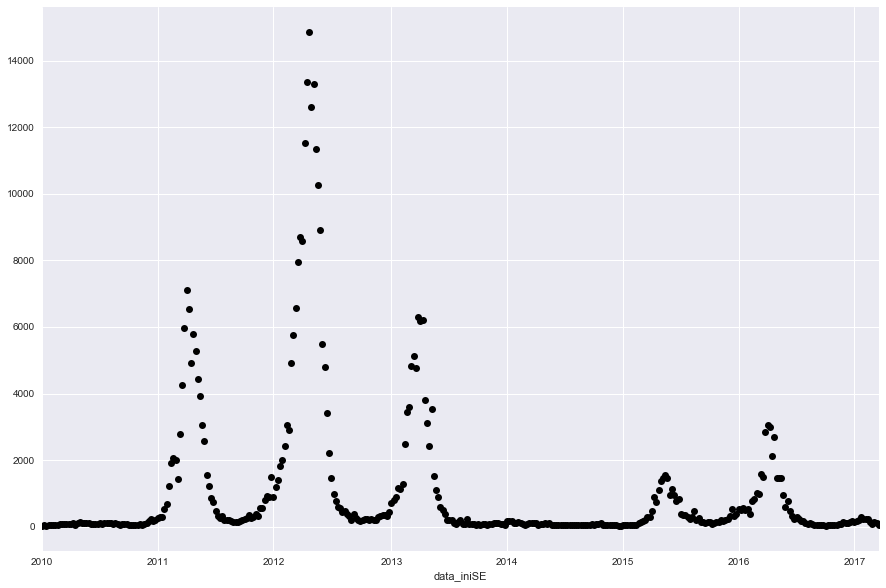

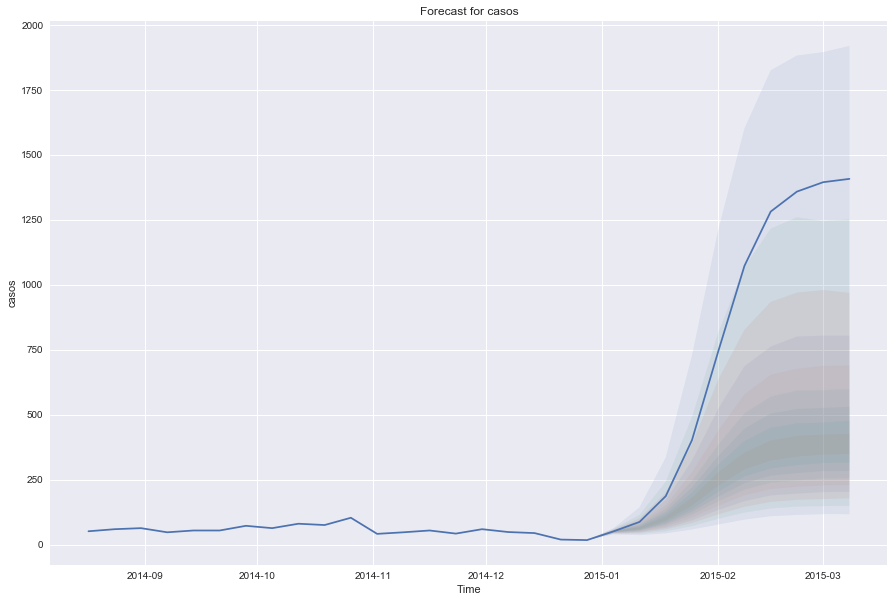

In [21]:
plt.figure()
ax = plt.gca()
train = Full.loc[Full.index<'2015-01-01']
model_3 = GAS.build_model(train, ar=2, sc=6, target='casos')
fit_3 = model_3.fit()
Full.casos.plot(style='ko', ax=ax, figsize=(15,10))
plt.hold(True)
model_3.plot_predict(h=10, past_values=20, ax=ax, figsize=(15,10))

In [35]:
model_4 = GASX.build_model(Full.dropna(), ar=4, sc=6, formula='casos~1+temp_min')

In [36]:
fit_4 = model_4.fit()

In [37]:
fit_4.summary()

Poisson GAS X(4,0,6)                                                                                      
======================================================= ==================================================
Dependent Variable: casos                               Method: MLE                                       
Start Date: 2012-09-16 00:00:00                         Log Likelihood: -53834.0499                       
End Date: 2016-07-31 00:00:00                           AIC: 107692.0998                                  
Number of observations: 202                             BIC: 107731.799                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    -0.1871    nan        nan      nan      (nan | nan)              
AR(2)                                

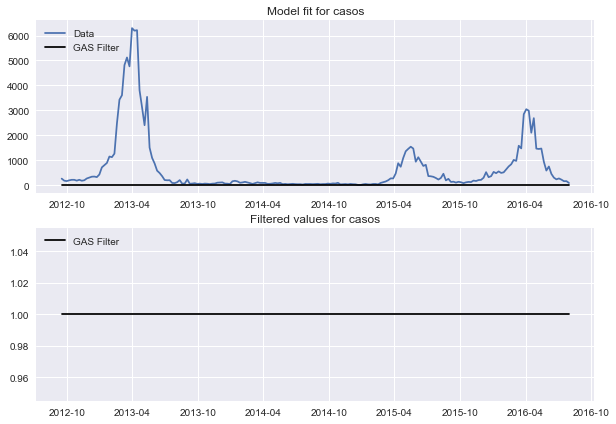

In [33]:
model_4.plot_fit()

In [34]:
model_4.plot_predict(h=10, past_values=15)

PatsyError: Error evaluating factor: TypeError: 'NoneType' object is not subscriptable
    casos~1+temp_min
            ^^^^^^^^

# Looking at state-wide data

In [46]:
rio  = get_alerta_table(state='RJ')

In [47]:
rio.head()

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome
data_iniSE,,,,,,,,,,,,
2010-01-03,201001,9.0,9,9,9,3300100,0.0,4.866440,0,1,2017-01-25,Angra dos Reis
2010-01-03,201001,0.0,0,0,0,3300159,0.0,0.000000,0,1,2017-01-25,Aperibé
2010-01-03,201001,1.0,1,1,1,3300209,0.0,0.826802,0,1,2017-01-25,Araruama
2010-01-03,201001,0.0,0,0,0,3300225,0.0,0.000000,0,1,2017-01-25,Areal
2010-01-03,201001,0.0,0,0,0,3300233,0.0,0.000000,0,1,2017-01-25,Armação dos Búzios


Let's keep only the columns we want to use

In [48]:
for col in ['casos_est_min', 'casos_est_max', 'Localidade_id', 'versao_modelo', 'municipio_nome']:
    del rio[col]

In [49]:
rio.head()

,SE,casos_est,casos,municipio_geocodigo,p_rt1,p_inc100k,nivel
data_iniSE,,,,,,,
2010-01-03,201001,9.0,9,3300100,0.0,4.866440,1
2010-01-03,201001,0.0,0,3300159,0.0,0.000000,1
2010-01-03,201001,1.0,1,3300209,0.0,0.826802,1
2010-01-03,201001,0.0,0,3300225,0.0,0.000000,1
2010-01-03,201001,0.0,0,3300233,0.0,0.000000,1


### Converting dataframe from long format to wide format

The dataframe currently have all cities stacked on top of each other. In order to use this data in a predictive model, we need this table in wide format, that is, have only time along the rows and have cities variable listed as columns.

In [50]:
riopiv = rio.pivot(index=rio.index, columns='municipio_geocodigo')

In [51]:
riopiv.head()

SE                                                  \
municipio_geocodigo 3300100 3300159 3300209 3300225 3300233 3300258 3300308   
data_iniSE                                                                    
2010-01-03           201001  201001  201001  201001  201001  201001  201001   
2010-01-10           201002  201002  201002  201002  201002  201002  201002   
2010-01-17           201003  201003  201003  201003  201003  201003  201003   
2010-01-24           201004  201004  201004  201004  201004  201004  201004   
2010-01-31           201005  201005  201005  201005  201005  201005  201005   

                                              ...     nivel                  \
municipio_geocodigo 3300407 3300456 3300506   ...   3305604 3305703 3305752   
data_iniSE                                    ...                             
2010-01-03           201001  201001  201001   ...         1       1       1   
2010-01-10           201002  201002  201002   ...         1       1       1   
2010-01-17           201003  201003  201003   ...         1       1       1   
2010-01-24           201004  201004  201004   ...         1       1       4   
2010-01-31           201005  201005  201005   ...         1       1       4   

                                                                             
municipio_geocodigo 3305802 3305901 3306008 3306107 3306156 3306206 3306305  
data_iniSE                                                                   
2010-01-03                1       1       1       1       1       1       1  
2010-01-10                1       1       1       1       1       1       1  
2010-01-17                1       1       1       1       1       1       1  
2010-01-24                1       1       1       1       1       1       1  
2010-01-31                1       1       1       1       1       1       1  

[5 rows x 552 columns]

In [52]:
riopiv['SE'].head()

municipio_geocodigo,3300100,3300159,3300209,3300225,3300233,3300258,3300308,3300407,3300456,3300506,...,3305604,3305703,3305752,3305802,3305901,3306008,3306107,3306156,3306206,3306305
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2010-01-03,201001,201001,201001,201001,201001,201001,201001,201001,201001,201001,...,201001,201001,201001,201001,201001,201001,201001,201001,201001,201001
2010-01-10,201002,201002,201002,201002,201002,201002,201002,201002,201002,201002,...,201002,201002,201002,201002,201002,201002,201002,201002,201002,201002
2010-01-17,201003,201003,201003,201003,201003,201003,201003,201003,201003,201003,...,201003,201003,201003,201003,201003,201003,201003,201003,201003,201003
2010-01-24,201004,201004,201004,201004,201004,201004,201004,201004,201004,201004,...,201004,201004,201004,201004,201004,201004,201004,201004,201004,201004
2010-01-31,201005,201005,201005,201005,201005,201005,201005,201005,201005,201005,...,201005,201005,201005,201005,201005,201005,201005,201005,201005,201005


Now we have a multi-level column index. It may be preferable to flatten it.

In [53]:
riopiv.columns = ['{}_{}'.format(*col).strip() for col in riopiv.columns.values]
riopiv.head()

,SE_3300100,SE_3300159,SE_3300209,SE_3300225,SE_3300233,SE_3300258,SE_3300308,SE_3300407,SE_3300456,SE_3300506,...,nivel_3305604,nivel_3305703,nivel_3305752,nivel_3305802,nivel_3305901,nivel_3306008,nivel_3306107,nivel_3306156,nivel_3306206,nivel_3306305
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2010-01-03,201001,201001,201001,201001,201001,201001,201001,201001,201001,201001,...,1,1,1,1,1,1,1,1,1,1
2010-01-10,201002,201002,201002,201002,201002,201002,201002,201002,201002,201002,...,1,1,1,1,1,1,1,1,1,1
2010-01-17,201003,201003,201003,201003,201003,201003,201003,201003,201003,201003,...,1,1,1,1,1,1,1,1,1,1
2010-01-24,201004,201004,201004,201004,201004,201004,201004,201004,201004,201004,...,1,1,4,1,1,1,1,1,1,1
2010-01-31,201005,201005,201005,201005,201005,201005,201005,201005,201005,201005,...,1,1,4,1,1,1,1,1,1,1


In [54]:
riopiv.shape

(368, 552)